In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from imutils import paths
import argparse

In [2]:
datasets = r'D:\Deep Learning Project\Covid 19 Detection Model using Chest X-ray\Data'

In [3]:
INIT_LR = 1e-3
EPOCHS = 10
BS = 8


In [4]:
args = {}
args['datasets'] = datasets

In [5]:
args

{'datasets': 'D:\\Deep Learning Project\\Covid 19 Detection Model using Chest X-ray\\Data'}

## Extracting the data from the model and splitting them into Data And Labels Becoz Here We Have Images

In [6]:
import numpy as np
import cv2
import os

iPaths = list(paths.list_images(args["datasets"]))
data=[]
labels=[]

for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]
    image= cv2.imread(iPath)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    data.append(image)
    labels.append(label)
    
data = np.array(data)/255.0
labels = np.array(labels)

In [7]:
image

array([[[65, 65, 65],
        [68, 68, 68],
        [66, 66, 66],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [ 9,  9,  9]],

       [[68, 68, 68],
        [66, 66, 66],
        [67, 67, 67],
        ...,
        [19, 19, 19],
        [13, 13, 13],
        [17, 17, 17]],

       [[67, 67, 67],
        [69, 69, 69],
        [69, 69, 69],
        ...,
        [27, 27, 27],
        [20, 20, 20],
        [20, 20, 20]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [8]:
image.shape

(224, 224, 3)

In [9]:
data

array([[[[0.52156863, 0.52156863, 0.52156863],
         [0.47843137, 0.47843137, 0.47843137],
         [0.45098039, 0.45098039, 0.45098039],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.52156863, 0.52156863, 0.52156863],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.41568627, 0.41568627, 0.41568627],
         [0.36470588, 0.36470588, 0.36470588],
         [0.34509804, 0.34509804, 0.34509804],
         ...,
         [0.49411765, 0.49411765, 0.49411765],
         [0.48627451, 0.48627451, 0.48627451],
         [0.99607843, 0.99607843, 0.99607843]],

        [[0.21568627, 0.21568627, 0.21568627],
         [0.18039216, 0.18039216, 0.18039216],
         [0.18823529, 0.18823529, 0.18823529],
         ...,
         [0.4745098 , 0.4745098 , 0.4745098 ],
         [0.45490196, 0.45490196, 0.45490196],
         [0.99607843, 0.99607843, 0.99607843]],

        ...,

        [[0.96862745, 0.96862745, 0.96862745],
         [0.95294118, 0.95294118, 0.95294118]

In [10]:
labels

array(['Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid', 'Covid',
       'Covid', 'Cov

In [11]:
import os
datasets = "Data//"

In [12]:
Cimages = os.listdir(datasets+"Covid")
Nimages = os.listdir(datasets+"Normal")

Normal Chest X-ray Vs Covid-19 Chest X-ray


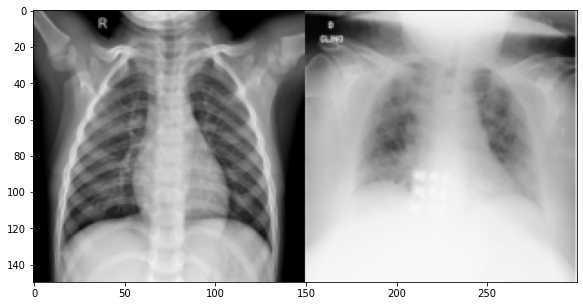

Normal Chest X-ray Vs Covid-19 Chest X-ray


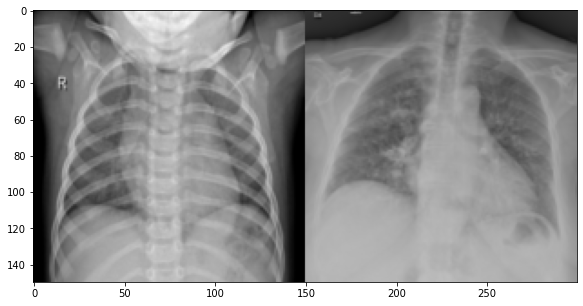

Normal Chest X-ray Vs Covid-19 Chest X-ray


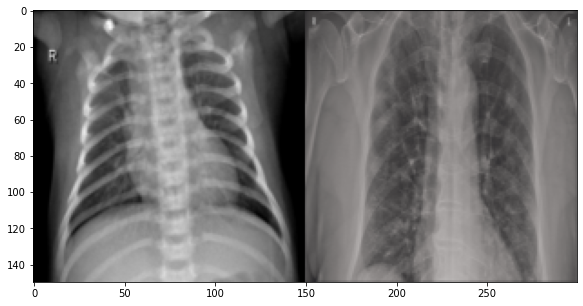

Normal Chest X-ray Vs Covid-19 Chest X-ray


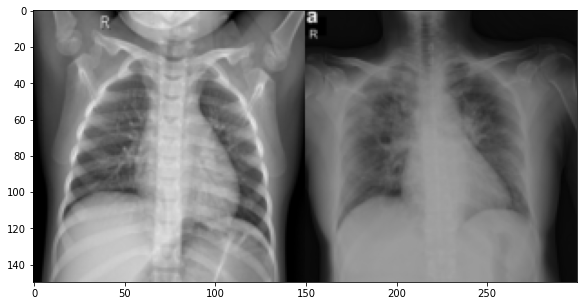

Normal Chest X-ray Vs Covid-19 Chest X-ray


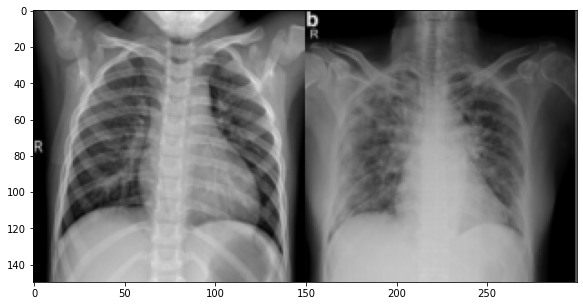

In [13]:
import matplotlib.pyplot as plt
import cv2
import skimage
from skimage.transform import resize
import numpy as np
def plotter(i):
    normal = cv2.imread(datasets+"Normal//"+Nimages[i])
    normal = skimage.transform.resize(normal, (150, 150, 3))
    coronavirus = cv2.imread(datasets+"Covid//"+Cimages[i])
    coronavirus = skimage.transform.resize(coronavirus, (150, 150, 3) , mode = 'reflect')
    pair = np.concatenate((normal, coronavirus), axis=1)
    print("Normal Chest X-ray Vs Covid-19 Chest X-ray")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

In [14]:
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 

## Splitting the data into training data and Testing Data

In [15]:
(X_train,X_test,Y_train,Y_test) = train_test_split(data,labels,test_size=0.2,random_state=42,stratify=labels)

In [16]:
X_train.shape

(160, 224, 224, 3)

In [17]:
Y_test.shape

(40, 2)

In [18]:
trainAug = ImageDataGenerator(rotation_range=15,fill_mode='nearest')


In [19]:
trainAug

## Base Model (Flatten Layers)

## We are Training our model using predefined Layers called transfer Learning From Imagenet Method in Deep Learning 

In [20]:
bmodel = VGG16(weights='imagenet',include_top =False,input_tensor=Input(shape=(224,224,3)))

In [21]:
bmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Custom Training(Dense Layers)

In [22]:
hmodel = bmodel.output
hmodel = AveragePooling2D(pool_size=(4,4))(hmodel)
hmodel = Flatten(name='flatten')(hmodel)
hmodel = Dense(64,activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation='softmax')(hmodel)

model=Model(bmodel.input,hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [23]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


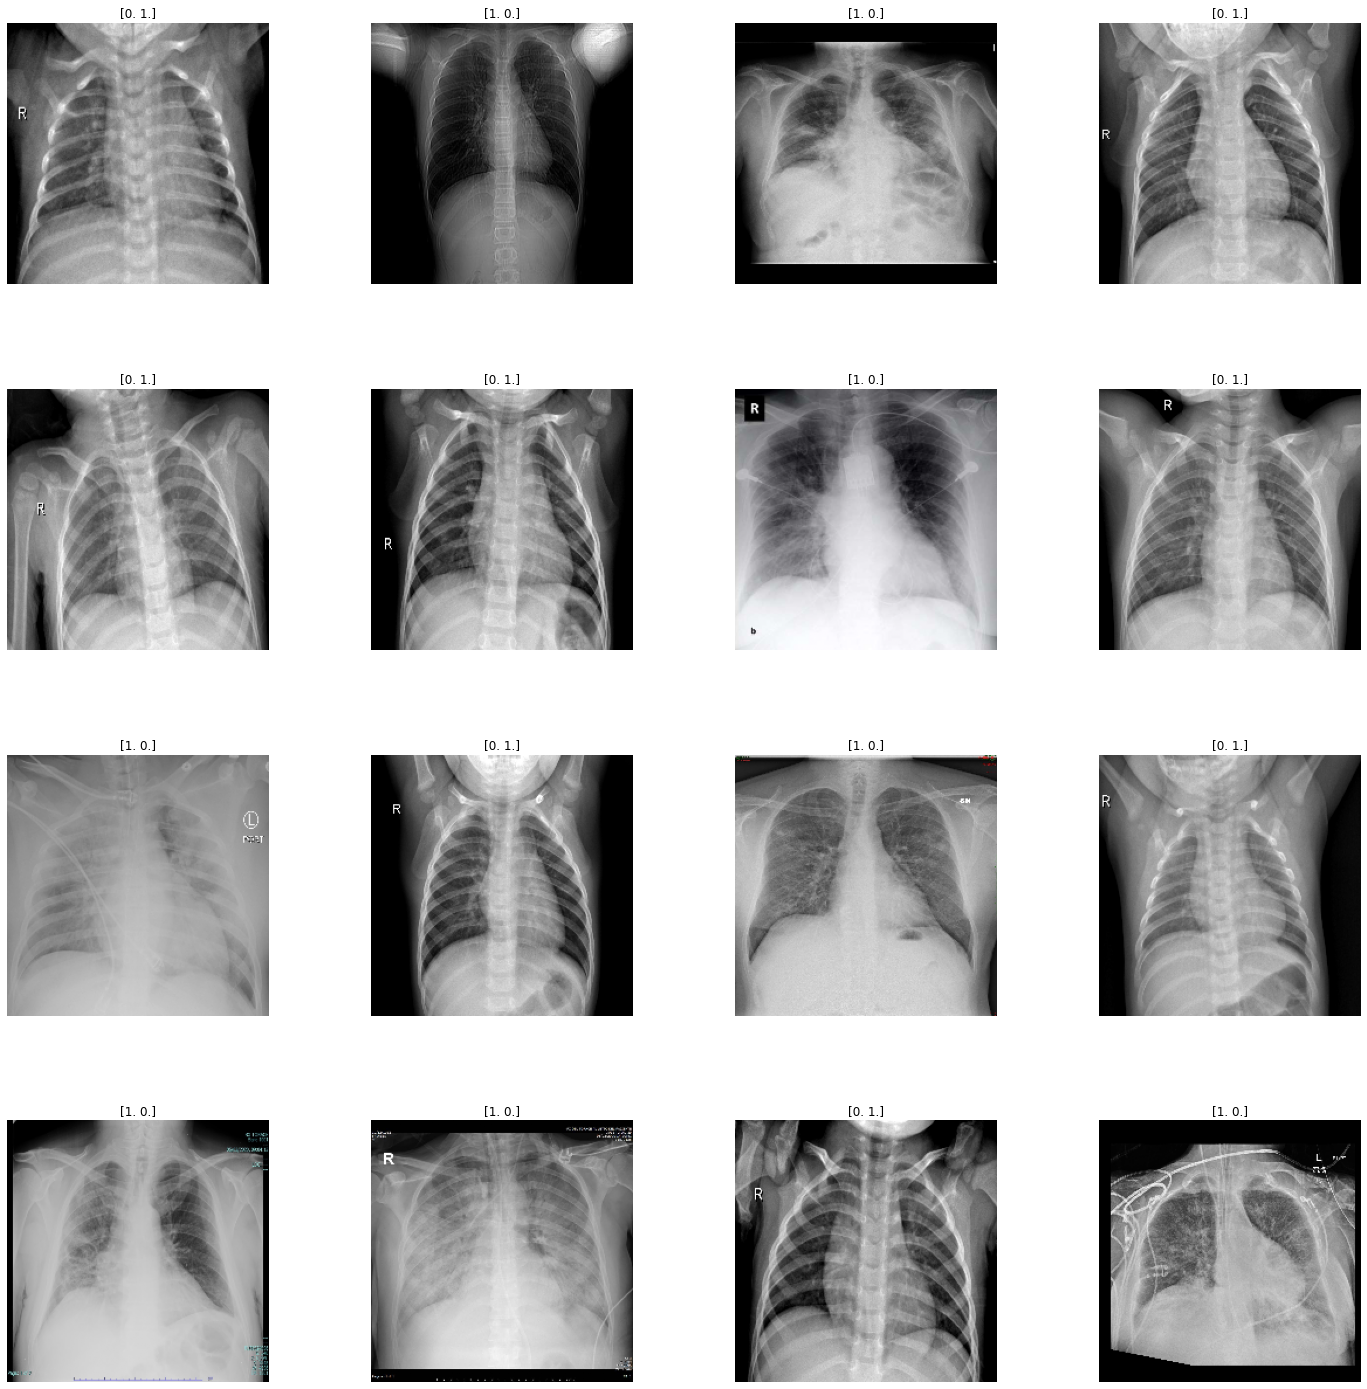

In [24]:
W_grid = 4 #width
L_grid = 4 #lenth
fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplots
axes = axes.ravel()
n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) # pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(Y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4)

## Model Training Final Touch

In [32]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
print("Compiling Starts")
R = model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS)

Compiling Starts


C:\Users\devan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\devan\AppData\Local\Temp/ipykernel_8980/2776203992.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 0.3396 - accuracy: 0.9125 - val_loss: 0.2883 - val_accuracy: 0.9500
Epoch 2/10
20/20 [==============================] - 51s 3s/step - loss: 0.2750 - accuracy: 0.9688 - val_loss: 0.2520 - val_accuracy: 0.9250
Epoch 3/10
20/20 [==============================] - 52s 3s/step - loss: 0.2102 - accuracy: 0.9563 - val_loss: 0.1904 - val_accuracy: 1.0000
Epoch 4/10
20/20 [==============================] - 52s 3s/step - loss: 0.1843 - accuracy: 0.9688 - val_loss: 0.1620 - val_accuracy: 1.0000
Epoch 5/10
20/20 [==============================] - 54s 3s/step - loss: 0.1528 - accuracy: 0.9937 - val_loss: 0.1433 - val_accuracy: 1.0000
Epoch 6/10
20/20 [==============================] - 54s 3s/step - loss: 0.1459 - accuracy: 0.9688 - val_loss: 0.1196 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 48s 2s/step - loss: 0.1085 - accuracy: 0.9875 - val_loss: 0.1225 - val_accuracy: 1.0000
Epoch 8/10
20/20 [==

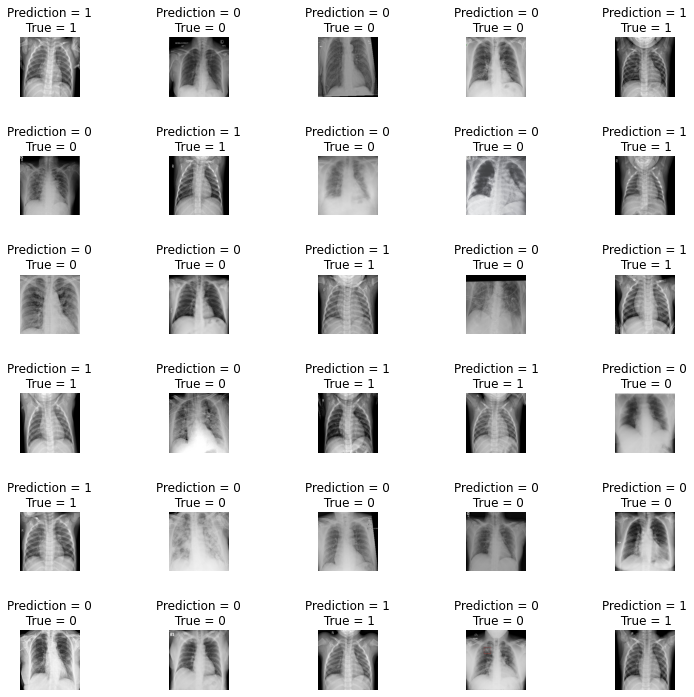

In [33]:
L = 6
W = 5
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
y_pred = model.predict(X_test, batch_size=BS)
for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(y_pred.argmax(axis=1)[i], Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1, hspace=1)   

In [38]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test,batch_size=BS)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(Y_test.argmax(axis=1),y_pred,target_names=LB.classes_))

              precision    recall  f1-score   support

       Covid       1.00      1.00      1.00        20
      Normal       1.00      1.00      1.00        20

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



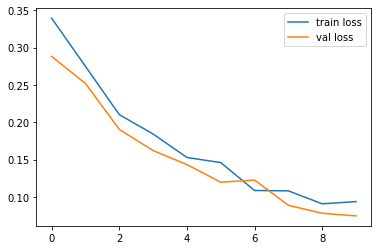

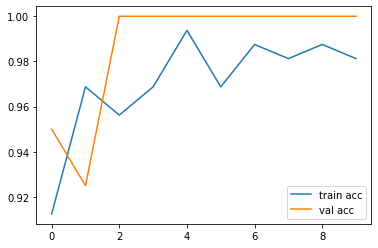

In [39]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [40]:
model.save(r'D:\\Deep Learning Project\\Covid 19 Detection Model using Chest X-ray\\model.h5')

In [43]:
import tensorflow as tf
from keras_preprocessing import image
model = tf.keras.models.load_model(r'D:\\Deep Learning Project\\Covid 19 Detection Model using Chest X-ray\\model.h5')
from keras.applications.vgg16 import preprocess_input


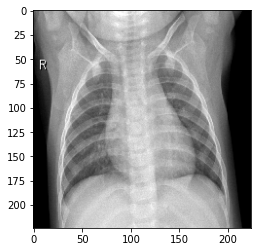

In [50]:
img = image.load_img(r'D:\Deep Learning Project\Covid 19 Detection Model using Chest X-ray\Data\Normal\IM-0182-0001.jpeg',target_size=(224,224))
imgplot = plt.imshow(img)

In [51]:
X = image.img_to_array(img)
X=np.expand_dims(X,axis=0)


In [52]:
X

array([[[[ 90.,  90.,  90.],
         [ 97.,  97.,  97.],
         [110., 110., 110.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 86.,  86.,  86.],
         [ 99.,  99.,  99.],
         [102., 102., 102.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[ 79.,  79.,  79.],
         [ 94.,  94.,  94.],
         [ 92.,  92.,  92.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [53]:
img_data = preprocess_input(X)

In [54]:
img_data

array([[[[ -13.939003 ,  -26.779    ,  -33.68     ],
         [  -6.939003 ,  -19.779    ,  -26.68     ],
         [   6.060997 ,   -6.7789993,  -13.68     ],
         ...,
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ]],

        [[ -17.939003 ,  -30.779    ,  -37.68     ],
         [  -4.939003 ,  -17.779    ,  -24.68     ],
         [  -1.939003 ,  -14.778999 ,  -21.68     ],
         ...,
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ]],

        [[ -24.939003 ,  -37.779    ,  -44.68     ],
         [  -9.939003 ,  -22.779    ,  -29.68     ],
         [ -11.939003 ,  -24.779    ,  -31.68     ],
         ...,
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ],
         [-103.939    , -116.779    , -123.68     ]],

In [ ]:
classes = model.predict(img_data)
New_pred = np.argmax(classes,axis=1)
if New_pred==[1]:
    print('The Prediction Is Normal')
else:
    print('The Prediction Is Corona')